<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/2025notebooks/2023_0423kondo_1000stimulus_re_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* date: 2023_0423
* filename: `2023_0423kondo_1000stimulus_re-evaluation.ipynb`
* author: Shin Asakawa

## 2023_0513 追記

### BCCWJ データ問題

以下は code 内に BCCWJ が入っているので，本ディレクトリにコピーした。

```bash
gcp ../../2022ccap/notebooks/2022_0213minnichi_lm_generator.ipynb .
gcp ../../2022kondo_project/notebooks/2021_1213bccwj_test.ipynb .
gcp ../../2022kondo_project/notebooks/2022_0202wiki_onomatope_filtered.ipynb .
```

### 常用漢字問題

開発した ortho2phon 読字モデルは，常用漢字しか扱っていなかった。
このため，常用漢字に定義されていない文字を含む語は，一部が unknown topen (`<UNK>`) として扱われることとなる。

具体的には，以下の 63 語が，常用漢字で定義されていない文字を含む単語刺激である

`['合鴨', '相槌', '赤錆', '熱燗', '斡旋', '甘鯛', '飴色', '飴玉', '石鯛', '芋粥', '金槌', '蟹玉', '蒲鉾', '革紐', '柑橘', '口髭', '栗色', '黒鯛', '啓蒙', '腰紐', '骨董', '昏睡', '混沌', '紺碧', '酒樽', '酒粕', '笹舟', '鮫肌', '沢蟹', '灼熱', '白樺', '惣菜', '竹竿', '竹薮', '只事', '只者', '縦縞', '吊鐘', '吊革', '釣竿', '吊棚', '吊橋', '鳩麦', '挽回', '晩餐', '髭面', '菱形', '呆然', '頬杖', '頬骨', '星屑', '松茸', '水飴', '耳垢', '麦藁', '薮蛇', '山鳩', '槍玉', '夕凪', '淋病', '牢獄', '歪曲', '若鮎']`

これらの 63 語を除外して 1000-63=937 語中の正解率をみると 615/937=0.65635 となり 65 % ほどの正解率となった。


### julius 表記との齟齬問題

近藤先生との相談の上，`1000stimulus-poponly-News2_2022.xlsx` の音韻表記と `jaconv.julius` の表記が異なる。
そのため，2023cnps で訓練済モデル `fname = 'RAM/2023_0313RAM_o2p_psylex71_30k_h256_leda.pt'` とは不一致が存在する。

そこで， `1000stimulus-poponly-News2_2022.xlsx` の 'yomo1' と 'yomi2' の両列から再構成した読みを julius 表記に変換して，正解データとみなした。

結果:

正解数は 615 となった。正解率では 0.615 であった。
それほど高い値ではないが，以前と比べれば向上している。

`1000stimulus-poponly-News_2022.xlsx` に記載されている音韻表記と julius 表記した音韻と異なる音韻表記は，248 語であった。

例えば以下の通りである:
```
:{'斡旋': {'phon_julius': 'aqseN', 'phon_orig': 'aQseN'}, '圧倒': {'phon_julius': 'aqto:', 'phon_orig': 'aQto:'}, '雨足': {'phon_julius': 'ama:shi', 'phon_orig': 'amaashi'}, '育成': {'phon_julius': 'ikusei', 'phon_orig': 'ikuse:'}, '飲食': {'phon_julius': 'iNshoku', 'phon_orig': 'iNshyoku'}, '印税': {'phon_julius': 'iNzei', 'phon_orig': 'iNze:'}, '上顎': {'phon_julius': 'uwa:go', 'phon_orig': 'uwaago'}, '上背': {'phon_julius': 'uwazei', 'phon_orig': 'uwaze:'},
```

音韻表現の異なった全単語を以下に示す:
```
print(phon_diffs)
['斡旋', '圧倒', '雨足', '育成', '飲食', '印税', '上顎', '上背', '運営', '雲泥', '影響', '永住', '鋭敏', '英雄', '越境', '炎上', '欧米', '屋上', '恩恵', '革命', '学校', '合作', '渇水', '活発', '金網', '歓迎', '吉報', '救出', '吟醸', '空襲', '屈辱', '栗色', '黒帯', '軍縮', '軽減', '芸術', '迎春', '計測', '警笛', '芸能', '啓蒙', '契約', '敬礼', '系列', '敬老', '月給', '欠勤', '傑作', '決着', '潔白', '剣術', '減税', '幻聴', '強情', '骨董', '昆虫', '婚礼', '撮影', '錯覚', '作曲', '殺菌', '雑菌', '里親', '算術', '暫定', '敷石', '下味', '失脚', '実態', '執筆', '弱小', '灼熱', '若輩', '尺八', '釈明', '借用', '醜悪', '重圧', '収縮', '住宅', '終点', '終電', '充電', '充満', '集約', '縦列', '収賄', '縮尺', '熟読', '宿泊', '祝福', '出願', '純愛', '潤滑', '準急', '俊足', '瞬発', '順番', '純朴', '巡礼', '順列', '掌握', '消音', '昇格', '正月', '照準', '上旬', '常食', '乗船', '醸造', '承諾', '衝突', '蒸発', '城壁', '静脈', '条約', '条例', '食通', '職人', '触発', '植毛', '尋常', '垂直', '凄腕', '制圧', '税額', '生活', '清潔', '税収', '青春', '整頓', '西北', '精米', '成立', '席上', '雪辱', '節水', '設定', '窃盗', '説得', '絶筆', '前衛', '先着', '操縦', '増収', '早春', '造成', '贈呈', '率直', '卒倒', '台形', '奪還', '脱走', '誕生', '壇上', '着水', '仲裁', '駐在', '注釈', '抽選', '駐屯', '中腹', '超越', '調教', '朝食', '長編', '眺望', '調律', '直列', '珍獣', '沈着', '釣糸', '提供', '低空', '抵抗', '体裁', '偵察', '定住', '邸宅', '停泊', '堤防', '撤収', '撤退', '徹底', '透明', '特訓', '突出', '長雨', '南米', '日直', '捻出', '粘着', '灰色', '敗因', '拝借', '買収', '賠償', '薄弱', '罰金', '白骨', '発色', '抜粋', '半周', '半熟', '判明', '筆跡', '匹敵', '漂着', '表明', '便乗', '藤色', '復権', '物色', '沸騰', '兵役', '弊害', '平然', '閉店', '併用', '並立', '別品', '報酬', '放出', '墨汁', '細腕', '北極', '勃発', '抹殺', '末端', '密告', '明確', '名作', '免税', '遊泳', '幼虫', '翌週', '抑制', '欲求', '陸上', '立腹', '猟銃', '臨終', '冷却', '例題', '列強', '練習', '若鮎', '腕章']
```

`1000stimulus-poponly-News2_2022.xlsx` に対して，
['word', 'model_output', 'julius_tch', 'yes/no', 'entropy'] の列を追加したエクセルファイルを
ファイル名 '2023_0423_1000stimulus-proponly-New2_2022.xlsx' として保存した


## isColab の判定とライブラリの輸入

In [ ]:
from IPython import get_ipython
isColab = 'google.colab' in str(get_ipython())

if isColab:
    # numpy は python 処理系に予めインストールされている前提なので，このランタイムは再起動する必要がある
    #!pip install gensim==4.3 numpy==1.26 scipy==1.13.1
    !pip install gensim==4.3 numpy==1.26 scipy==1.10.1
    import numpy
    import scipy
    import gensim
    print(f'numpy.__version__:{numpy.__version__},\n',
          f'scipy.__version__:{scipy.__version__},\n',
          f'gensim.__version__:{gensim.__version__}\n# ランタイムを再起動してください Restart current runtime!')


In [ ]:
# 上セルに加えて Pytorch のバージョンもダウングレードする必要があるのかも知れない
if isColab:
    # numpy は python 処理系に予めインストールされている前提なので，このランタイムは再起動する必要がある
    !pip install torch==2.2
    import torch
    print(f'torch.__version__:{torch.__version__}')


In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

from IPython import get_ipython
isColab = 'google.colab' in str(get_ipython())

if isColab:

    # termcolor を downgrade しないと colab ではテキストに色がつかない
    !pip install --upgrade termcolor==1.1
    import termcolor

    !pip install jaconv

    # colab 上で MeCab を動作させるために，C コンパイラを起動して，MeCab の構築を行うため時間がかかる。
    !apt install aptitude
    !aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
    !pip install mecab-python3==0.7
    !pip install jaconv
    !pip install japanize_matplotlib

    import MeCab
    mecab_wakati = MeCab.Tagger('-Owakati').parse
    mecab_yomi = MeCab.Tagger('-Oyomi').parse
else:
    from ccap.mecab_settings import yomi as mecab_yomi
    from ccap.mecab_settings import wakati as mecab_wakati

import os
if not os.path.exists('RAM'):
    !git clone https://github.com/ShinAsakawa/RAM.git

from RAM.dataset import *
from RAM import check_vals_performance
from RAM import set_model_from_param_file
from RAM import check_fushimi1999_words

import matplotlib.pyplot as plt
try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib

from termcolor import colored

# 1. 訓練済パラメータの読み込み

In [6]:
%reload_ext autoreload
%autoreload 2

# 直下行では，fname を指定することで，異なる訓練済モデルを読み込むことが可能である。
#fname = 'RAM/2023_0306ram_psylex71_10k_h256_o2p.pt'
#fname = "RAM/2023_0315ram_psylex71_10k_h64_o2p.pt"
#fname = "RAM/2023_0315ram_psylex71_10k_h64_o2p_white_fushimi120.pt"
fname = 'RAM/2023_0313RAM_o2p_psylex71_30k_h256_leda.pt'
#fname = 'RAM/2023_0311RAM_o2p_psylex71_20k_h256.pt'
#_X = torch.load(fname)
#_X = torch.load(fname, weights_only=True)

# 訓練済ファイルを元に，モデルを復元，パラメータの再設定
encoder, decoder, encoder_optimizer, decoder_optimizer, params, ds = set_model_from_param_file(fname=fname)
fushimi1999_dataset = Fushimi1999_Dataset(source=params['source'], target=params['target'])

check_vals_performance(
    encoder=encoder, decoder=decoder,
    _dataset={'Fushimi1999':fushimi1999_dataset},
    source_vocab=ds.source_list, target_vocab=ds.target_list,
    max_length=ds.maxlen, device=device)

for k, v in sorted(params.items()):
    print(k, colored(v,'blue',attrs=['bold']))

dataset_name psylex71
decoder AttnDecoderRNN(
  (embedding): Embedding(48, 256)
  (attn): Linear(in_features=512, out_features=33, bias=True)
  (attn_combine): Linear(in_features=512, out_features=256, bias=True)
  (dropout): Dropout(p=0.0, inplace=False)
  (gru): GRU(256, 256)
  (out_layer): Linear(in_features=256, out_features=48, bias=True)
)
decoder_optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
dropout_p 0.0
encoder EncoderRNN(
  (embedding): Embedding(2375, 256)
  (gru): GRU(256, 256)
)
encoder_optimizer Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.0001
    maximize: False
    weight_decay: 0
)
epochs 30
hidden_size 256
loss_func NLLLoss()
losses [1.7812093782818887, 1

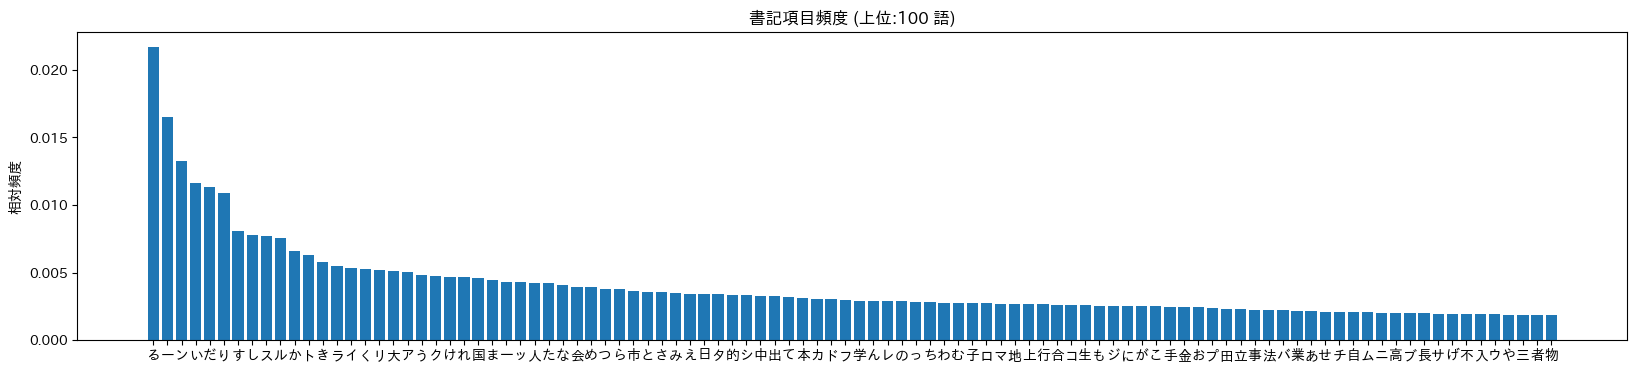

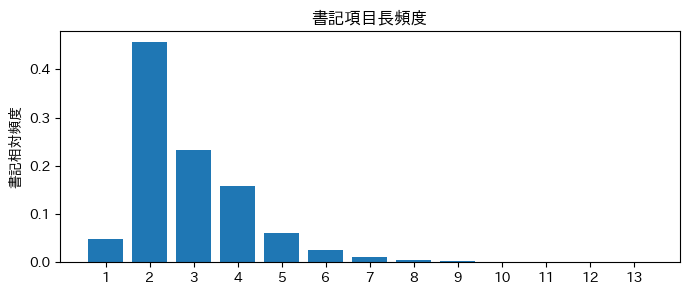

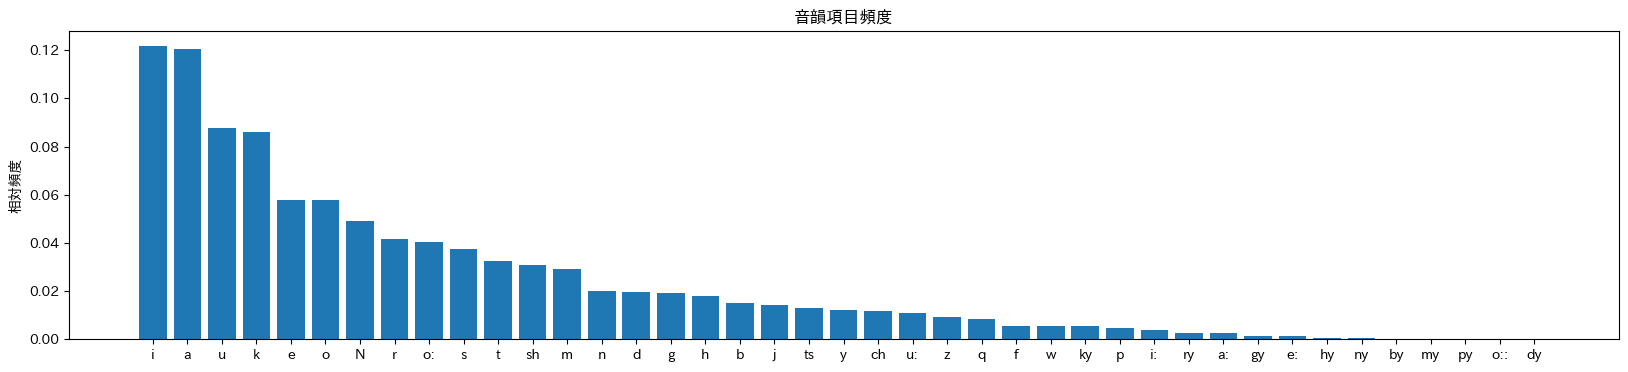

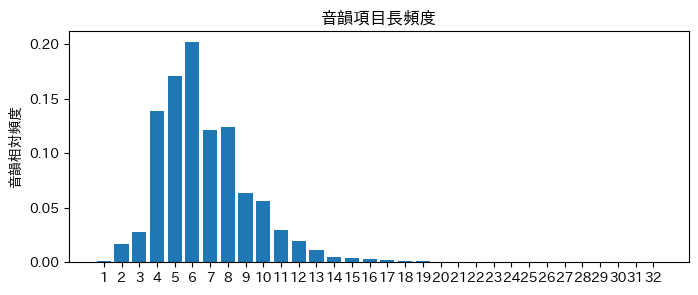

<function matplotlib.pyplot.show(close=None, block=None)>

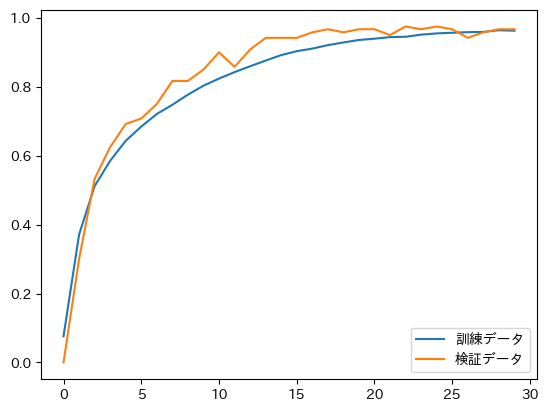

In [7]:
from RAM import draw_word_char_histgram

draw_word_char_histgram(_dict=ds.data_dict, key='orth', title='書記', figsize2=(8,3))
#plt.savefig('2023_0313psylex71_30k_orth_freq.pdf')
draw_word_char_histgram(_dict=ds.data_dict, key='phon', title='音韻', figsize2=(8,3))
#plt.savefig('2023_0313psylex71_30k_phon_freq.pdf')

plt.plot(params['train_accus'], label='訓練データ')
plt.plot([float(v[0].split(':')[-1]) for v in params['val_accus']], label='検証データ')
plt.legend(loc='lower right')
plt.show

In [8]:
print(list(params.keys()))

['dataset_name', 'traindata_size', 'traindata_ratio', 'source', 'target', 'hidden_size', 'stop_list', 'white_list', 'epochs', 'lr', 'dropout_p', 'teacher_forcing_ratio', 'optim_func', 'loss_func', 'random_seed', 'pretrained', 'verbose', 'path_saved', 'losses', 'train_accus', 'val_accus', 'encoder', 'decoder', 'encoder_optimizer', 'decoder_optimizer']


## 1.1 Fushimi1999 の成績

In [9]:
from RAM import eval_input_seq2seq
import numpy as np

check_fushimi1999_words(encoder=encoder, decoder=decoder, cr_every=4, ds=ds)

cr_every = 4
entropies = []
for i, wrd in enumerate(fushimi1999_list[:]):
#for i, wrd in enumerate(fushimi1999_list[120:]):
    #print(i+121, wrd)
    dec_wrd, topvs = eval_input_seq2seq(encoder=encoder, decoder=decoder, ds=ds, inp_wrd=wrd, isPrint=False)
    dec_wrd = "".join(p for p in dec_wrd[:-1])
    p = np.exp(np.array(topvs)).mean()
    ent = - p * np.log(p)

    #ent = np.array(topvs).mean()
    entropies.append(ent)
    _end = '\n' if ((i+1) % cr_every) == 0 else ", "
    print(f'{i+1:3d} {wrd}->/{dec_wrd}/ {ent:.4f}', end=_end)

001 戦争 :/seNso:/(seNso:) True, 002 倉庫 :/so:ko/(so:ko) True, 003 医学 :/igaku/(igaku) True, 004 注意 :/chu:i/(chu:i) True
005 記念 :/kineN/(kineN) True, 006 番号 :/baNgo:/(baNgo:) True, 007 料理 :/ryo:ri/(ryo:ri) True, 008 完全 :/kaNzeN/(kaNzeN) True
009 開始 :/kaishi/(kaishi) True, 010 印刷 :/iNsatsu/(iNsatsu) True, 011 連続 :/reNzoku/(reNzoku) True, 012 予約 :/yoyaku/(yoyaku) True
013 多少 :/tasho:/(tasho:) True, 014 教員 :/kyo:iN/(kyo:iN) True, 015 当局 :/to:kyoku/(to:kyoku) True, 016 材料 :/zairyo:/(zairyo:) True
017 夕刊 :/yu:kaN/(yu:kaN) True, 018 労働 :/ro:do:/(ro:do:) True, 019 運送 :/uNso:/(uNso:) True, 020 電池 :/deNchi/(deNchi) True
021 反対 :/haNtai/(haNtai) True, 022 失敗 :/shiqpai/(shiqpai) True, 023 作品 :/sakuhiN/(sakuhiN) True, 024 指定 :/shitei/(shitei) True
025 実験 :/jiqkeN/(jiqkeN) True, 026 決定 :/keqtei/(keqtei) True, 027 独占 :/hitoriuranai/(hitoriuranai) True, 028 独身 :/dokushiN/(dokushiN) True
029 固定 :/kotei/(kotei) True, 030 食品 :/shokuhiN/(shokuhiN) True, 031 表明 :/hyo:mei/(hyo:mei) True, 032 安定 :/aNtei/(aNtei)

# 4. 近藤 & Wydell リスト '1000stimulus-proponly-New2_2022.xls' の読み込み

In [ ]:
# `1000stimulus-proponly-New2_2022.xls` ファイルの読み込み
kondo_1000stim_fname = '1000stimulus-proponly-New2_2022.xls'
if not os.path.exists(kondo_1000stim_fname) and isColab:
    from google.colab import files
    uploaded = files.upload()

kondo_pd = pd.read_excel('1000stimulus-proponly-New2_2022.xls', sheet_name='data')
kondo1000_dict = {}
phon_diffs = {}
for r in kondo_pd.iterrows():
    idx = r[1]['id']                     # ID を idx として格納
    wrd = r[1]['kanji1']+r[1]['kanji2']  # 一文字目と二文字目を連結して単語 wrd として格納
    yomi = r[1]['yomi1']+r[1]['yomi2']   # 同様にヨミを yomi として格納

    # ヨミの julius 表現を phon_julius として登録
    phon_julius = jaconv.hiragana2julius(jaconv.kata2hira(yomi)).split()

    # オリジナルのヨミを phon として登録
    phon = [r[1]['mora11'], r[1]['mora12'], r[1]['mora21'], r[1]['mora22']]

    _phon_j = "".join(_p for _p in phon_julius)
    _phon   = "".join(_p for _p in phon)

    if _phon_j != _phon:
        if not wrd in phon_diffs:
            phon_diffs[wrd] = {'phon_julius': _phon_j, 'phon_orig':_phon}
        else:
            print(wrd, 'is duplicated')

    # 上記を合わせて辞書として登録
    kondo1000_dict[idx] = {'wrd':wrd,
                           'yomi':yomi,
                           'phon':phon_julius,
                           'phon_orig':phon, 'dict':r[1]}

print(f'len(phon_diffs):{len(phon_diffs)}')
#print(phon_diffs)
#print(f'len(phon_diffs):{len(phon_diffs)}, phon_diffs:{phon_diffs}')


len(phon_diffs):248


In [ ]:
unk_tokens = []
for i, k in enumerate(kondo1000_dict.keys()):
    wrd = kondo1000_dict[k]['wrd']
    ids = ds.orth_tkn2ids(wrd)
    _wrd = ds.orth_ids2tkn(ids)
    if ds.orth_list.index('<UNK>') in ids:
        unk_tokens.append((i, wrd, ids, _wrd))

print(len(unk_tokens), [_u[1] for _u in unk_tokens])

63 ['合鴨', '相槌', '赤錆', '熱燗', '斡旋', '甘鯛', '飴色', '飴玉', '石鯛', '芋粥', '金槌', '蟹玉', '蒲鉾', '革紐', '柑橘', '口髭', '栗色', '黒鯛', '啓蒙', '腰紐', '骨董', '昏睡', '混沌', '紺碧', '酒樽', '酒粕', '笹舟', '鮫肌', '沢蟹', '灼熱', '白樺', '惣菜', '竹竿', '竹薮', '只事', '只者', '縦縞', '吊鐘', '吊革', '釣竿', '吊棚', '吊橋', '鳩麦', '挽回', '晩餐', '髭面', '菱形', '呆然', '頬杖', '頬骨', '星屑', '松茸', '水飴', '耳垢', '麦藁', '薮蛇', '山鳩', '槍玉', '夕凪', '淋病', '牢獄', '歪曲', '若鮎']


In [ ]:
from RAM import chars_joyo
_joyo = chars_joyo()
joyo_df = _joyo.df
joyo_chars = joyo_df['通用字体'].to_list()
print(len(joyo_chars))

aaa = []
for x in unk_tokens:
    wrd = x[1]
    judge = [ch in joyo_chars for ch in wrd]
    aaa.append((wrd, judge))

print(aaa)

2136
[('合鴨', [True, False]), ('相槌', [True, False]), ('赤錆', [True, False]), ('熱燗', [True, False]), ('斡旋', [False, True]), ('甘鯛', [True, False]), ('飴色', [False, True]), ('飴玉', [False, True]), ('石鯛', [True, False]), ('芋粥', [True, False]), ('金槌', [True, False]), ('蟹玉', [False, True]), ('蒲鉾', [False, False]), ('革紐', [True, False]), ('柑橘', [False, False]), ('口髭', [True, False]), ('栗色', [False, True]), ('黒鯛', [True, False]), ('啓蒙', [True, False]), ('腰紐', [True, False]), ('骨董', [True, False]), ('昏睡', [False, True]), ('混沌', [True, False]), ('紺碧', [True, False]), ('酒樽', [True, False]), ('酒粕', [True, False]), ('笹舟', [False, True]), ('鮫肌', [False, True]), ('沢蟹', [True, False]), ('灼熱', [False, True]), ('白樺', [True, False]), ('惣菜', [False, True]), ('竹竿', [True, False]), ('竹薮', [True, False]), ('只事', [False, True]), ('只者', [False, True]), ('縦縞', [True, False]), ('吊鐘', [False, True]), ('吊革', [False, True]), ('釣竿', [True, False]), ('吊棚', [False, True]), ('吊橋', [False, True]), ('鳩麦', [False, True]), ('挽

```
以下はgradeが8なのにいただいた63語に入ってません
1文字目
眉尻      wakurr
凄腕      hoidesu
袖丈      shu:daku
藤棚      fujita
餅肌      moqto
鍵穴      kawaku
脇腹      arabura
釜飯      kamui
羨望      kabo:
鍋底      baseo
脇差      wasa
尻軽      shikira
喉笛      rigimm
勃発      mahaatsu
喉元      kotomoto
膝元      ishimoto
藤色      fujiro
餅米      mobei
脇道      o:mido:
袖口      hadaguchi
袖下      hoshigata
捻出      aruide
股下      mokura

2文字目
謙遜      keNbe
片袖      katabaru
関脇      sekiwake
暗闇      aNsai
整頓      seito
鼻唄      hanaoka
深爪      shiNgyaka
合鍵      gatsuki
後釜      go:kai
今頃      koNso
海亀      kaika
元旦      motigate
外股      gaitak
鳥籠      tori
石臼      sekio
上顎      jo:sue
年頃      neNso
中頃      chu:ko
生唾      seito:
二股      nitai
虫籠      muqto
夕闇      yu:gami
上蓋      jo:fu:

こららのうち，
関脇      sekiwake
は脇は常用漢字ではないですが読めているようです．
```

In [ ]:
# 近藤先生からいただいた上のリストをチェックしてみよう。
_first = ['眉尻','凄腕','袖丈','藤棚','餅肌','鍵穴','脇腹','釜飯','羨望','鍋底',
         '脇差','尻軽','喉笛','勃発','喉元','膝元','藤色','餅米','脇道','袖口',
         '袖下','捻出','股下']
_second = ['謙遜','片袖','関脇','暗闇','整頓','鼻唄','深爪','合鍵','後釜','今頃',
           '海亀','元旦','外股','鳥籠','石臼','上顎','年頃','中頃','生唾','二股',
           '虫籠','夕闇','上蓋']
_list = _first + _second
print(len(_first), len(_second), len(_list))
for wrd in _list:
    true_false = [(ch,ch in joyo_chars) for ch in wrd]
    #bbb.append(true_false)
    print(true_false)


23 23 46
[('眉', True), ('尻', True)]
[('凄', True), ('腕', True)]
[('袖', True), ('丈', True)]
[('藤', True), ('棚', True)]
[('餅', True), ('肌', True)]
[('鍵', True), ('穴', True)]
[('脇', True), ('腹', True)]
[('釜', True), ('飯', True)]
[('羨', True), ('望', True)]
[('鍋', True), ('底', True)]
[('脇', True), ('差', True)]
[('尻', True), ('軽', True)]
[('喉', True), ('笛', True)]
[('勃', True), ('発', True)]
[('喉', True), ('元', True)]
[('膝', True), ('元', True)]
[('藤', True), ('色', True)]
[('餅', True), ('米', True)]
[('脇', True), ('道', True)]
[('袖', True), ('口', True)]
[('袖', True), ('下', True)]
[('捻', True), ('出', True)]
[('股', True), ('下', True)]
[('謙', True), ('遜', True)]
[('片', True), ('袖', True)]
[('関', True), ('脇', True)]
[('暗', True), ('闇', True)]
[('整', True), ('頓', True)]
[('鼻', True), ('唄', True)]
[('深', True), ('爪', True)]
[('合', True), ('鍵', True)]
[('後', True), ('釜', True)]
[('今', True), ('頃', True)]
[('海', True), ('亀', True)]
[('元', True), ('旦', True)]
[('外', True), ('股', True)]
[('鳥', True), ('籠',

In [ ]:
# 上セルで登録した kondo1000_dict を使ってモデルの正誤判定を行う
n_hit = 0
N = 0
responses = []
yesnos = []
entropies = []
julius_tchs = []
words = []
for i, (idx, v) in enumerate(kondo1000_dict.items()):
    wrd = v['wrd']
    phn = v['phon']
    phn_orig = v['phon_orig']


    # encoder と decoder を与えてモデルの出力を得る
    output = eval_input_seq2seq(encoder=encoder, decoder=decoder, ds=ds, inp_wrd=wrd, isPrint=False)

    # トークンの切り方が異なる場合があるので，出力と教師との両者とも連結してから比較
    # 出力トークンを連結して res とする
    res = "".join(_p for _p in output[0][:-1])

    # 教師信号トークンを連結して tch とする
    tch = "".join(_p for _p in phn)

    yesno = res == tch                   # 正誤判定
    #color = 'grey' if yesno else 'red'   # 読みが正しければ グレー，誤っていれば 赤
    if yesno:                            # 正答数をインクリメント
        n_hit += 1
        color = 'grey'
    else:
        color = 'red'

    unk_flag = False
    _ids = ds.orth_tkn2ids(wrd)
    _wrd = ds.orth_ids2tkn(ids)
    if ds.orth_list.index('<UNK>') in _ids:
        unk_flag = True
        color = 'grey'
    else:
        N += 1

    words.append(wrd)
    julius_tchs.append(tch)
    responses.append(res)
    yesnos.append(yesno)

    logp = output[1]             # 出力の対数確率
    p = np.exp(logp)             # 対数確率を指数乗して元の確率に戻す
    entropy = np.sum(- p * logp) # 戻した確率と対数確率の積の総和からエントロピーを計算
    entropies.append(entropy)

    if not unk_flag:
        #print(f'{i:3d} 刺激語:{wrd} 正解:{tch}, 反応:{res}, entropy:{entropy:.3f}',
        #      f'{colored(yesno, color=color, attrs=["bold"])}')
        ;
    else:
        print(colored(f'{i:3d} 刺激語:{wrd} 教師信号:{tch}, 反応:{res}, entropy:{entropy:.3f}',color=color),
              f'{colored(yesno, color=color, attrs=["bold"])}')

    #print(f'{i:3d} 刺激語:{wrd} 正解:{tch}, 反応:{res}, entropy:{entropy:.3f} {colored(yesno,color)}')
    #print(i, wrd, "".join(_p for _p in phn), res, f'{entropy:.3f}', colored(yesno,color))
    #if i > 30:
    #    sys.exit()


print(f'n_hit:{n_hit}/N:{N}={n_hit/N*100:.3f}')

# kondo_pd['word'] = words
# kondo_pd['model_output'] = responses
# kondo_pd['julius_tch'] = julius_tchs
# kondo_pd['yes/no'] = yesnos
# kondo_pd['entropy'] = entropies
# kondo_pd.to_excel('2023_0423_1000stimulus-proponly-New2_2022.xlsx')
# kondo_pd

NameError: name 'kondo1000_dict' is not defined

上の結果から，1000 単語中 615 語しか正解できなかった。
そこで，`近藤 & Wydell リスト '1000stimulus-proponly-New2_2022.xls'` を使って再訓練をしてみる。


In [ ]:
#list(kondo1000_dict.values())[:3]

In [ ]:
fname = 'RAM/2023_0313RAM_o2p_psylex71_30k_h256_leda.pt'
_X = torch.load(fname)

# 訓練済ファイルを元に，モデルを復元，パラメータの再設定
encoder, decoder, encoder_optimizer, decoder_optimizer, params, ds = set_model_from_param_file(fname=fname)
fushimi1999_dataset = Fushimi1999_Dataset(source=params['source'], target=params['target'])

check_vals_performance(
    encoder=encoder, decoder=decoder,
    _dataset={'Fushimi1999':fushimi1999_dataset},
    source_vocab=ds.source_list, target_vocab=ds.target_list,
    max_length=ds.maxlen, device=device)

for k, v in sorted(params.items()):
    print(k, colored(v,'blue',attrs=['bold']))

In [ ]:
kondo_pd[['kanji1','kanji2']]

In [ ]:
class kondo1000_Dataset(RAM_Dataset):
    def __init__(self,
                 source:str="orth",
                 target:str="phon",
                 max_words:int=20000,
                 white_list:list=fushimi1999_list[:120],
                 stop_list:list=[] #fushimi1999_list[:120],
                ):

        super().__init__()
        self.datasetname = 'psylex71'
        psylex71_data_fname = 'RAM/psylex71_data.gz'
        with gzip.open(psylex71_data_fname, 'rb') as zipfile:
            _X = json.loads(zipfile.read().decode('utf-8'))
        psylex71_dict = _X['dict']
        psylex71_freq = _X['freq']

        self.max_words = max_words
        self.phon_list = super().get_phon_list()
        self.jchar_list = super().get_jchar_list()
        self.source = source
        self.target = target
        self.orth_list = self.jchar_list

        data_dict, orth_maxlen, phon_maxlen = {}, 0, 0
        self.white_list = white_list

        for wrd in white_list:
            idx = len(data_dict)
            val = psylex71_dict[wrd]
            data_dict[idx] = val

            orth_len = len(psylex71_dict[wrd]['orth'])
            if orth_len > orth_maxlen:
                orth_maxlen = orth_len
            phon_len = len(psylex71_dict[wrd]["phon"])
            if phon_len > phon_maxlen:
                phon_maxlen = phon_len


        for wrd in psylex71_freq:
            if not wrd in stop_list:
                idx = len(data_dict)
                val = psylex71_dict[wrd]
                data_dict[idx] = val

                orth_len = len(psylex71_dict[wrd]['orth'])
                if orth_len > orth_maxlen:
                    orth_maxlen = orth_len
                phon_len = len(psylex71_dict[wrd]["phon"])
                if phon_len > phon_maxlen:
                    phon_maxlen = phon_len

                if idx >= (max_words -1):
                    break

        self.orth_maxlen = orth_maxlen + 1
        self.phon_maxlen = phon_maxlen + 1
:


In [ ]:
jaconv.hiragana2julius(jaconv.kata2hira(kondo1000_dict[41]['yomi'])).split()

In [ ]:
logp = np.array([-0.38164880871772766, -0.178680881857872, -0.07732096314430237, -0.003106769872829318, -0.03272553160786629, -0.9834433197975159, -0.05197757109999657])
p = np.exp(logp)
print(np.sum(- p * logp))
print(np.mean(- p * logp))